<a href="https://colab.research.google.com/github/VirtueZhao/Dive-into-Deep-Learning/blob/main/3_2_Linear_Regression_Implementation_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import torch
import d2l as d2l

In [24]:
def synthetic_data(w, b, num_examples):
  X = torch.normal(0,1,(num_examples,len(w)))
  y = torch.matmul(X,w) + b
  y += torch.normal(0,0.01,y.shape)
  # print(y)
  y_reshape = y.reshape((-1,1))
  # print(y_reshape)

  return X,y.reshape((-1,1))

In [45]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [46]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-1.1887, -0.2250]) 
label: tensor([2.5734])


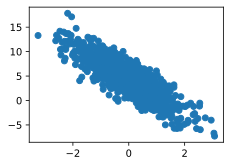

In [47]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(), labels.detach().numpy())

In [71]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)

  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [74]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tensor([[ 0.9332,  0.7681],
        [ 2.0460,  1.1465],
        [ 0.6286, -0.5305],
        [ 0.0809, -0.0605],
        [ 0.4344, -0.2019],
        [ 3.1011, -2.1880],
        [-0.6435,  0.3710],
        [ 0.8042, -0.2517],
        [ 0.8660, -0.1775],
        [-0.5138,  1.5633]]) 
 tensor([[ 3.4660],
        [ 4.3858],
        [ 7.2664],
        [ 4.5715],
        [ 5.7336],
        [17.8371],
        [ 1.6730],
        [ 6.6680],
        [ 6.5457],
        [-2.1437]])


In [76]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)